- 1.`get` (對網站請求)               `request level:1`
  可能需要填入headers
- 2.`post` (對網站請求)              `request level:2`
  可能需要填入headers,data
- 3.`session` (對需要登入的網站做請求)`request level:3`
  先用session紀錄網站login的請求(post)所得cookie，再用同一session做登入後網站請求

In [1]:
import requests

# 看網站資訊決定要用get還是用post請求網站

- post or get ??
<img src="session.png" width=400 height=100>

In [38]:
#可傳入1.params(dict) 2.data(dict) 3.headers(dict) 4.proxies(dict)
# --------------------------------------------------------------
# example
# params = {'q':'役男'}
# data = {'email':'email_test'}
# headers = {'user-agent': 'Mozilla/5.0}
# proxies= {'http':'183.245.98.6:8118'}
# response = requests.get(url,params=params,data=data,headers=headers,proxies=proxies)

b'<!doctype html><html lang="zh-TW"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>\xa7\xd0\xa8k - Google \xb7j\xb4M</title><script nonce="Crk+Mz/Oq9sX1t4M2ze3DQ==">(function(){document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);}).call(this);(function(){var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,e=c.responseStart;if(e>d&&e<=window.start){window.start=e;b.wsrt=e-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};google.aft=function(f){f.setAttribute("data-iml",+new Date)};}).call(this);(function(){window.jsarwt=function(){return!1};}).call(this);(function(){var c=[],e=0;window.ping=function(b){-1==b.indexOf("&zx")&&(b+="&z
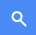

In [37]:
response.content
#response.content:bytes原始碼，可以.decode('utf-8')嘗試解碼
#response.text:解碼後的str文字檔
#response.json():若請求為json檔案，可以轉成字典格式
#response.status_code:狀態碼

# 3.session

### 條件位置

- data = ??
<img src="session2.png" width=400 height=100>

- headers information??
<img src="session3.png" width=600 height=500>

In [22]:
#1.創一個可以記錄cookie的session
s = requests.session()
#2.登入網址
login = 'https://zh-tw.facebook.com/login/'
#3.填入登入需要資訊
header={
'referer': 'https://zh-tw.facebook.com/',
'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
}
data ={
    'email': 'email_test',
    'pass': 'pass_test'
}
#4.先訪問登入網站獲取登入cookie(由上圖可知login請求為post)
s.post(url=login,headers=header,data=data)
#5.取得cookie後就可以用同個session訪問需要登入的網頁
response = s.get('https://www.facebook.com/profile.php?id=100002479281895')
#6.可將網站儲存觀察有沒有抓到登入後的網站
with open('test.html','w',encoding='utf-8') as f:
    f.write(response.text)